#                                        IMDB WEB SCRAPE


### Importing libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from matplotlib import pyplot as plt

### Creating an Agent and a Dictionary to access the web and store the data

In [2]:
agent = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"}
movie_dict ={
    "Title" : [],"Release year": [],"Rating": [],"Genre": [],
    "Run time":[],"Director":[],"Cast":[],"Votes":[]
}

### Defining a function to scrape the contents and data from the web

In [3]:
def scraping(Movie_data):
    
    for data in Movie_data:
        
        movie_dict["Title"].append(data.find("h3",class_='lister-item-header').a.text)
        movie_dict["Release year"].append(data.find("h3", class_='lister-item-header').find("span", class_="lister-item-year").text)
        movie_dict["Rating"].append(data.find("div",class_="ratings-bar").strong.text)
        movie_dict["Genre"].append(data.find("p",class_="text-muted").find("span",class_="genre").text)
        movie_dict["Run time"].append(data.find("p",class_="text-muted").find("span",class_="runtime").text)
        movie_dict["Director"].append(data.find("p",class_="").a.text)
        cast_elements = data.find("p", class_="").find_all("a", href=True)
        movie_dict["Cast"].append(", ".join(a.text for a in cast_elements if "/name/nm" in a["href"]))
        elements=data.find("p",class_="sort-num_votes-visible").find("span",{"name":"nv"})
        movie_dict["Votes"].append(data.find("p",class_="sort-num_votes-visible").find("span",{"name":"nv"}).text)
        
        
        
        

### Building a for loop to access the data from all the pages in the website

In [4]:
for page in range(0,901,100):
    page = page + 1 
    url = f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={page}&ref_=adv_nxt"
    response = requests.get(url,headers=agent)
    soup = BeautifulSoup(response.content,"html.parser")
    soup = soup.find_all("div",class_="lister-item-content")
    scraping(soup)

### checking the size of the values in the dictionary

In [5]:
for i in movie_dict.keys():
    print(len(movie_dict[i]))

1000
1000
1000
1000
1000
1000
1000
1000


### Creating a Pandas Data Frame

In [6]:
imdb = pd.DataFrame(movie_dict)

In [7]:
imdb.head()

,Title,Release year,Rating,Genre,Run time,Director,Cast,Votes
0,The Shawshank Redemption,(1994),9.3,\nDrama,142 min,Frank Darabont,"Frank Darabont, Tim Robbins, Morgan Freeman, B...","2,802,566"
1,The Godfather,(1972),9.2,"\nCrime, Drama",175 min,Francis Ford Coppola,"Francis Ford Coppola, Marlon Brando, Al Pacino...","1,952,792"
2,The Dark Knight,(2008),9.0,"\nAction, Crime, Drama",152 min,Christopher Nolan,"Christopher Nolan, Christian Bale, Heath Ledge...","2,784,234"
3,Schindler's List,(1993),9.0,"\nBiography, Drama, History",195 min,Steven Spielberg,"Steven Spielberg, Liam Neeson, Ralph Fiennes, ...","1,409,005"
4,12 Angry Men,(1957),9.0,"\nCrime, Drama",96 min,Sidney Lumet,"Sidney Lumet, Henry Fonda, Lee J. Cobb, Martin...","833,506"


### Changing the Data Types

In [8]:
imdb["Votes"] = imdb["Votes"].str.replace(',','').astype(int)

In [9]:
imdb["Release year"] = imdb["Release year"].str.replace('(','').str.replace(')','')

C:\Users\srira\AppData\Local\Temp\ipykernel_20168\1115082308.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imdb["Release year"] = imdb["Release year"].str.replace('(','').str.replace(')','')


### Filtering the year data to ensure data integrity

In [10]:
for i in imdb["Release year"]:
    try:
        if type(int(i)) == int:
            pass
    except ValueError:
        print(i)

II 2018
I 2019
I 2017
I 2020
I 2015
I 2013
I 2015
I 2015
III 2016
I 2015
I 2014
I 2004
II 2016
I 2017
I 2014
I 2011
I 2001
I 2015
I 2017
I 2011
I 2013
I 2008
I 2006
I 2022
I 2010
I 2007
I 2014
II 2022
I 2004
I 1995
I 2004
I 2010
II 2016
I 1985
III 2018


In [11]:
year = []
for i in imdb["Release year"]:
    for j in i:
        try:
            j = int(j)
            year.append(j)
        except ValueError:
            pass
print(year[0:10])

[1, 9, 9, 4, 1, 9, 7, 2, 2, 0]


### Transforming the year data 

In [12]:
index = 1
year_list = [ ]
year_str =""
for j in year:
    year_str = year_str + str(j)
    index +=1
    if index > 4:
        year_list.append(year_str)
        index = 1
        year_str = ""
        
year_list[0:10]

['1994',
 '1972',
 '2008',
 '1993',
 '1957',
 '2003',
 '1974',
 '1994',
 '1999',
 '2010']

In [15]:
imdb["Release year"] =  year_list

### Cleaning the Genre Data 

In [16]:
imdb["Genre"] = imdb["Genre"].str.replace('\n','')

### Changing the datatypes 

In [17]:
imdb["Release year"] = pd.to_datetime(imdb["Release year"]).dt.year

In [18]:
imdb["Rating"] = pd.to_numeric(imdb["Rating"])

In [19]:
imdb.head()

,Title,Release year,Rating,Genre,Run time,Director,Cast,Votes
0,The Shawshank Redemption,1994,9.3,Drama,142 min,Frank Darabont,"Frank Darabont, Tim Robbins, Morgan Freeman, B...",2802453
1,The Godfather,1972,9.2,"Crime, Drama",175 min,Francis Ford Coppola,"Francis Ford Coppola, Marlon Brando, Al Pacino...",1952706
2,The Dark Knight,2008,9.0,"Action, Crime, Drama",152 min,Christopher Nolan,"Christopher Nolan, Christian Bale, Heath Ledge...",2784107
3,Schindler's List,1993,9.0,"Biography, Drama, History",195 min,Steven Spielberg,"Steven Spielberg, Liam Neeson, Ralph Fiennes, ...",1408946
4,12 Angry Men,1957,9.0,"Crime, Drama",96 min,Sidney Lumet,"Sidney Lumet, Henry Fonda, Lee J. Cobb, Martin...",833445


### Saving the file as excel

In [20]:
imdb.to_excel(r"C:\Users\srira\Downloads\IMDB_webscrape.xlsx")

In [21]:
Top_directors = imdb["Director"].value_counts()[0:10]

Text(0.5, 1.0, 'TOP FILM MAKERS BY TOTAL NUMBER OF MOVIES IN TOP 1000')

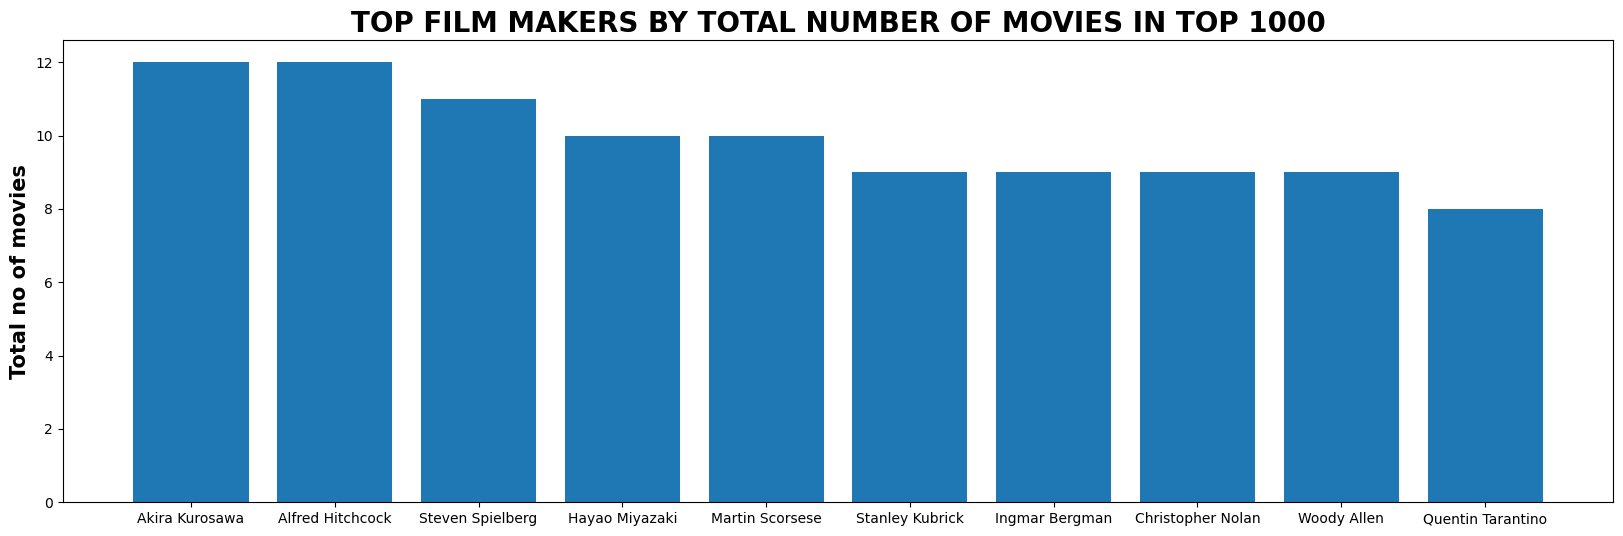

In [22]:
plt.figure(figsize=(20,6))
plt.bar(Top_directors.keys(),Top_directors)
plt.ylabel('Total no of movies',fontweight = 'bold',fontsize = 15)
plt.title('TOP FILM MAKERS BY TOTAL NUMBER OF MOVIES IN TOP 1000',fontweight='bold',fontsize = 20)

In [23]:
Top_FM = imdb.groupby("Director")["Rating"].sum().reset_index()

In [24]:
Top_FM = Top_FM.sort_values('Rating',ascending = False)[0:10]

Text(0.5, 1.0, 'TOP FILM MAKERS BY RATINGS OF MOVIES IN TOP 1000')

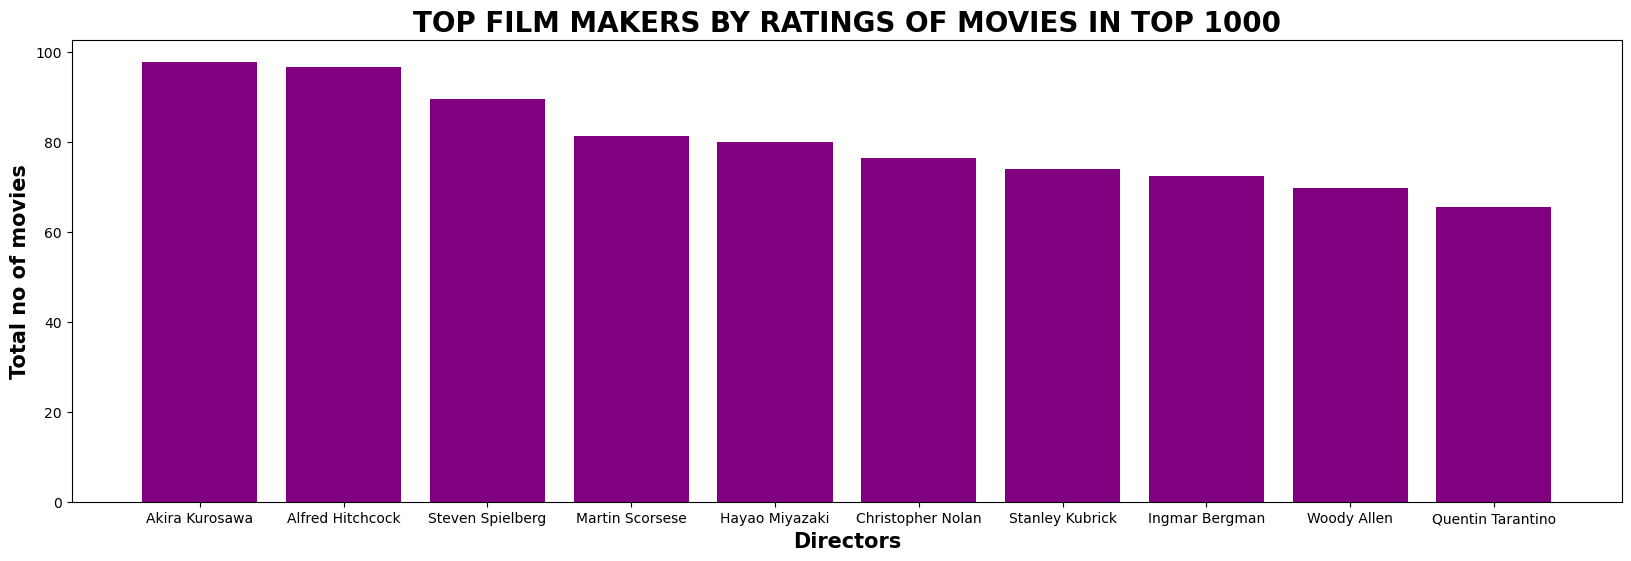

In [25]:
plt.figure(figsize=(20,6))
plt.bar(Top_FM["Director"],Top_FM["Rating"],color='purple')
plt.xlabel('Directors',fontweight = 'bold',fontsize=15)
plt.ylabel('Total no of movies',fontweight = 'bold',fontsize = 15)
plt.title('TOP FILM MAKERS BY RATINGS OF MOVIES IN TOP 1000',fontweight='bold',fontsize = 20)

In [26]:
year = imdb.groupby("Release year")["Rating"].sum().reset_index()
year = year.sort_values("Release year")

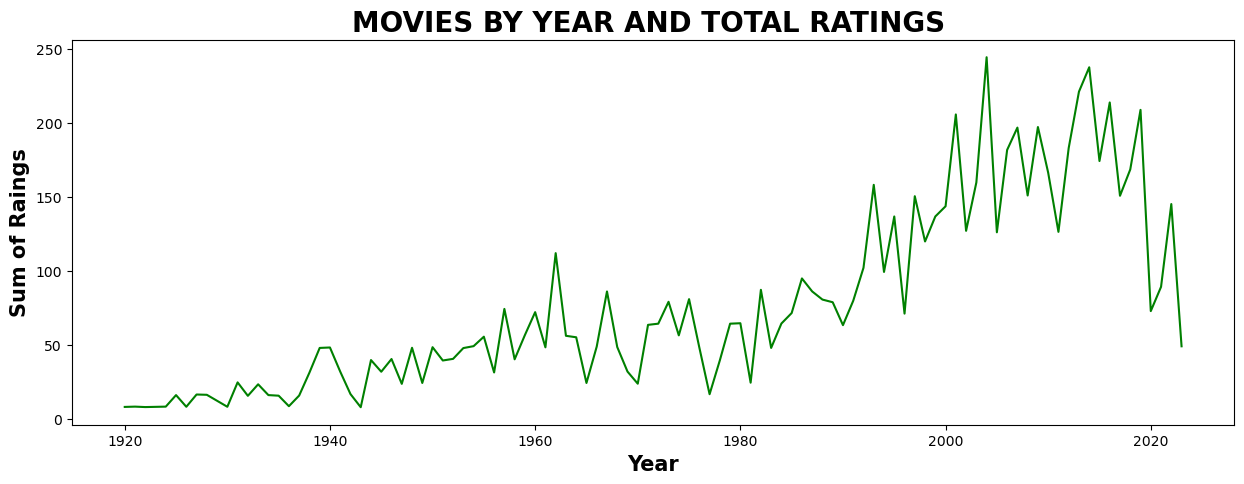

In [81]:
plt.figure(figsize=(15,5))
plt.plot(year["Release year"],year["Rating"],color = 'green')
plt.title("MOVIES BY YEAR AND TOTAL RATINGS ",fontweight='bold',fontsize=20)
plt.xlabel("Year",fontweight='bold',fontsize=15)
plt.ylabel("Sum of Raings",fontweight='bold',fontsize=15)
plt.show()

In [69]:
Genre = imdb["Genre"].value_counts()[0:10]

In [70]:
Genre

Drama                                       93
Drama, Romance                              40
Comedy, Drama                               34
Comedy, Drama, Romance                      31
Crime, Drama, Thriller                      30
Animation, Adventure, Comedy                29
Action, Crime, Drama                        29
Crime, Drama, Mystery                       29
Biography, Drama, History                   27
Crime, Drama                                23
Name: Genre, dtype: int64

In [65]:
Genre

Drama                                     93
Drama, Romance                            40
Comedy, Drama                             34
Comedy, Drama, Romance                    31
Crime, Drama, Thriller                    30
                                          ..
Crime, Sci-Fi                              1
Drama, History                             1
Drama, Thriller, Western                   1
Mystery, Romance, Thriller                 1
Action, Crime, Mystery                     1
Name: Genre, Length: 194, dtype: int64

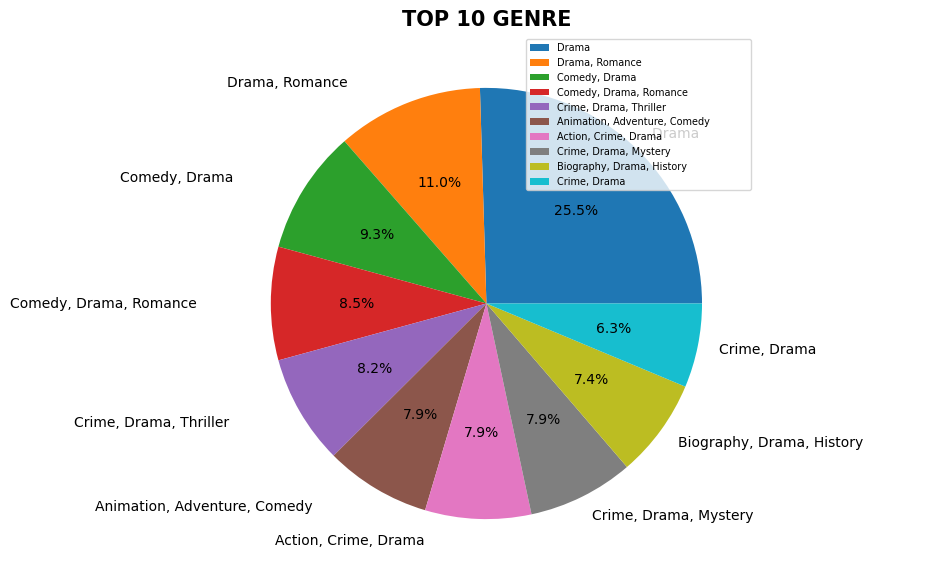

In [91]:
plt.figure(figsize=(15,7))
plt.pie(Genre.values,labels = Genre.keys(),autopct = "%1.1f%%")
plt.title("TOP 10 GENRE",fontweight = 'bold',fontsize=15)
plt.legend(fontsize=7)
plt.show()